# Setting Everything Up

In [28]:
import pandas as pd
from datetime import datetime

In [29]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.2f}'.format

import string

%matplotlib inline

In [30]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
%%R

# My commonly used R imports

require('tidyverse')

In [33]:
#To Download PDFs
from urllib.parse import urljoin

In [34]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [35]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)
library(ggrepel)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Is there a difference between stock based compensation expense for years where the effective tax rate is low ?


#### Null hypothesis:
There is no difference between the stock based compensation expense for years where the effective tax rate is low.

# Read the dataframe

Created these majorly from 10Ks for the top 100 companies by market capitalisation

In [38]:
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste=pd.read_csv('df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_w_python_calc.csv')

In [39]:
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste

,Unnamed: 0.1,to_freeze_name,market_cap_rank,Unnamed: 2,Unnamed: 0,name,american_progress_list,market_cap,price,cik_str,ticker,title_searchable,title_confirmed,just_tech_or_non_tech,tech_or_non_tech,ten_k_document_link,actual_full_ten_k_document_link,most_recent_tax_benefits_from_stock_based_compensation_over_net_income,most_recent_tax_benefits_from_stock_based_compensation,tax_benefits_from_stock_based_compensation_2023,tax_benefits_from_stock_based_compensation_2022,tax_benefits_from_stock_based_compensation_2021,tax_benefits_from_stock_based_compensation_2020,tax_benefits_note,most_recent_stock_or_share_based_compensation,most_recent_stock_or_share_based_compensation_expounded,stock_or_share_based_compensation_end_of_2023,stock_or_share_based_compensation_end_of_2022,stock_or_share_based_compensation_end_of_2021,stock_or_share_based_compensation_end_of_2020,stock_notes,most_recent_tax_rates_low_or_above_ten,most_recent_tax_rates_low_or_above_ten_expounded,most_recent_tax_rates,most_recent_tax_rates_expounded,tax_rates_2023,tax_rates_2022,tax_rates_2021,tax_rates_2020,most_recent_net_income,most_recent_net_income_expounded,net_income_2023,net_income_2022,net_income_2021,net_income_2020,stock_based_compensation_as_a_portion_of_net_income,python_calc_stock_based_compensation_as_a_portion_of_net_income_pct,python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct
0,0,Apple,1,0,0,Apple,absent,$3.030 T,$191.33,320193,AAPL,Apple Inc.,apple inc. (aapl),tech,tech,https://www.sec.gov//Archives/edgar/data/32019...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,-4.0,-4002,NaN,"-4,002","-4,056","-2,476",NaN,9280.0,"9,280",NaN,"9,280","8,108","6,975",NaN,above_ten,above_ten,16.2,16.2,NaN,16.2,13.3,14,99803.0,"99,803",NaN,"99,803","94,680","57,411",9,9.298318,-4.009900
1,1,Microsoft,2,1,1,Microsoft,present,$2.533 T,$338.15,789019,MSFT,MICROSOFT CORP,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/78901...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,2.0,1293,NaN,"1,293","1,065",938,NaN,7502.0,"7,502",NaN,"7,502","6,118","5,289",NaN,above_ten,above_ten,13.1,13.1,NaN,13.1,13.8,17,72738.0,"72,738",NaN,"72,738","61,271","44,281",10,10.313729,1.777613
2,2,Alphabet (Google),3,2,2,Alphabet (Google),absent,$1.553 T,$122.63,1652044,GOOG,Alphabet Inc.,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/16520...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,5.0,2700,NaN,"2,700","3,100","3,900",NaN,19362.0,"19,362",NaN,"19,362","15,376","12,991",NaN,above_ten,above_ten,15.9,15.9,NaN,15.9,16.2,NaN,59972.0,"59,972",NaN,"59,972","76,033",NaN,32,32.285066,4.502101
3,3,Amazon,4,3,3,Amazon,present,$1.337 T,$130.38,1018724,AMZN,AMAZON COM INC,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/10187...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,9.0,1900,NaN,"1,900","2,700","4,300",NaN,19621.0,"19,621",NaN,"19,621",12757,9208,NaN,NaN,NaN,NaN,unclear,NaN,unclear,unclear,unclear,21331.0,"21,331",NaN,"21,331","33,364","-2,722",92,91.983498,8.907224
4,4,NVIDIA,5,4,4,NVIDIA,absent,$1.045 T,$423.17,1045810,NVDA,NVIDIA CORP,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/10458...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,-7.0,-309,-309.0,-337,-136,NaN,NaN,2709.0,2709,NaN,"2,709","2,004","1,397",NaN,NaN,NaN,NaN,"Furthermore, the tax effects of accounting for...",NaN,"Furthermore, the tax effects of accounting for...",NaN,NaN,4368.0,"4,368","4,368","9,752","4,332",NaN,62,62.019231,-7.074176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Regeneron Pharmaceuticals,96,95,95,Regeneron Pharmaceuticals,absent,$78.75 B,$717.83,872589,REGN,"REGENERON PHARMACEUTICALS, INC.",NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/87258...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,725,NaN,725,601.7,432,NaN,abov

# Reading Data in R

In [40]:
%%R 

df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r <- read_csv('df_stock_top_us_plus_sec_titles_with_links_after_copy_paste.csv', show_col_types = FALSE)

New names:
• `` -> `...3`


## Are effective tax rates for companies below or above ten depending on the stock compensation expense?


#### Null hypothesis:
There is no difference between the stock-based compensation expenses for companies where the effective tax rates are above or below 10%

### Make a column that has stock based compensation as a proportion of net income
 * stock_based_compensation_as_a_portion_of_net_income
 * made it in excel stock_based_compensation_as_a_portion_of_net_income

In [41]:
import pandas as pd

# # Read the CSV file into a pandas DataFrame
# df_stock_top_us_plus_sec_titles_with_links_after_copy_paste = pd.read_csv("df_stock_top_us_plus_sec_titles_with_links_after_copy_paste.csv")

# Remove commas and convert the columns to floats
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_stock_or_share_based_compensation'] = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_stock_or_share_based_compensation'].astype(float)
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_net_income'] = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_net_income'].astype(float)
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_tax_benefits_from_stock_based_compensation'] = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_tax_benefits_from_stock_based_compensation'].str.replace(',', '').astype(float)

# Perform the desired calculations and create new columns
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['python_calc_stock_based_compensation_as_a_portion_of_net_income_pct'] = (df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_stock_or_share_based_compensation'] * 100) / df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_net_income']
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['python_calc_stock_based_compensation_as_a_portion_of_net_income_not_pct'] = (df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_stock_or_share_based_compensation']) / df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_net_income']
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct'] = (df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_tax_benefits_from_stock_based_compensation'] * 100) / df_stock_top_us_plus_sec_titles_with_links_after_copy_paste['most_recent_net_income']

# Print the DataFrame to check the changes
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste


,Unnamed: 0.1,to_freeze_name,market_cap_rank,Unnamed: 2,Unnamed: 0,name,american_progress_list,market_cap,price,cik_str,ticker,title_searchable,title_confirmed,just_tech_or_non_tech,tech_or_non_tech,ten_k_document_link,actual_full_ten_k_document_link,most_recent_tax_benefits_from_stock_based_compensation_over_net_income,most_recent_tax_benefits_from_stock_based_compensation,tax_benefits_from_stock_based_compensation_2023,tax_benefits_from_stock_based_compensation_2022,tax_benefits_from_stock_based_compensation_2021,tax_benefits_from_stock_based_compensation_2020,tax_benefits_note,most_recent_stock_or_share_based_compensation,most_recent_stock_or_share_based_compensation_expounded,stock_or_share_based_compensation_end_of_2023,stock_or_share_based_compensation_end_of_2022,stock_or_share_based_compensation_end_of_2021,stock_or_share_based_compensation_end_of_2020,stock_notes,most_recent_tax_rates_low_or_above_ten,most_recent_tax_rates_low_or_above_ten_expounded,most_recent_tax_rates,most_recent_tax_rates_expounded,tax_rates_2023,tax_rates_2022,tax_rates_2021,tax_rates_2020,most_recent_net_income,most_recent_net_income_expounded,net_income_2023,net_income_2022,net_income_2021,net_income_2020,stock_based_compensation_as_a_portion_of_net_income,python_calc_stock_based_compensation_as_a_portion_of_net_income_pct,python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct,python_calc_stock_based_compensation_as_a_portion_of_net_income_not_pct
0,0,Apple,1,0,0,Apple,absent,$3.030 T,$191.33,320193,AAPL,Apple Inc.,apple inc. (aapl),tech,tech,https://www.sec.gov//Archives/edgar/data/32019...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,-4.0,-4002.0,NaN,"-4,002","-4,056","-2,476",NaN,9280.0,"9,280",NaN,"9,280","8,108","6,975",NaN,above_ten,above_ten,16.2,16.2,NaN,16.2,13.3,14,99803.0,"99,803",NaN,"99,803","94,680","57,411",9,9.298318,-4.009900,0.092983
1,1,Microsoft,2,1,1,Microsoft,present,$2.533 T,$338.15,789019,MSFT,MICROSOFT CORP,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/78901...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,2.0,1293.0,NaN,"1,293","1,065",938,NaN,7502.0,"7,502",NaN,"7,502","6,118","5,289",NaN,above_ten,above_ten,13.1,13.1,NaN,13.1,13.8,17,72738.0,"72,738",NaN,"72,738","61,271","44,281",10,10.313729,1.777613,0.103137
2,2,Alphabet (Google),3,2,2,Alphabet (Google),absent,$1.553 T,$122.63,1652044,GOOG,Alphabet Inc.,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/16520...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,5.0,2700.0,NaN,"2,700","3,100","3,900",NaN,19362.0,"19,362",NaN,"19,362","15,376","12,991",NaN,above_ten,above_ten,15.9,15.9,NaN,15.9,16.2,NaN,59972.0,"59,972",NaN,"59,972","76,033",NaN,32,32.285066,4.502101,0.322851
3,3,Amazon,4,3,3,Amazon,present,$1.337 T,$130.38,1018724,AMZN,AMAZON COM INC,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/10187...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,9.0,1900.0,NaN,"1,900","2,700","4,300",NaN,19621.0,"19,621",NaN,"19,621",12757,9208,NaN,NaN,NaN,NaN,unclear,NaN,unclear,unclear,unclear,21331.0,"21,331",NaN,"21,331","33,364","-2,722",92,91.983498,8.907224,0.919835
4,4,NVIDIA,5,4,4,NVIDIA,absent,$1.045 T,$423.17,1045810,NVDA,NVIDIA CORP,NaN,tech,tech,https://www.sec.gov//Archives/edgar/data/10458...,https://www.sec.gov//ix?doc=/Archives/edgar/da...,-7.0,-309.0,-309.0,-337,-136,NaN,NaN,2709.0,2709,NaN,"2,709","2,004","1,397",NaN,NaN,NaN,NaN,"Furthermore, the tax effects of accounting for...",NaN,"Furthermore, the tax effects of accounting for...",NaN,NaN,4368.0,"4,368","4,368","9,752","4,332",NaN,62,62.019231,-7.074176,0.620192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Regeneron Pharmaceuticals,96,95,95,Regeneron Pharmaceuticals,absent,$78.75 B,$717.83,872589,REGN,"REGENERON PHARMACEUTICALS, INC.",NaN,tech,tech,https://www.sec.gov//Archives/edg

### Plotting

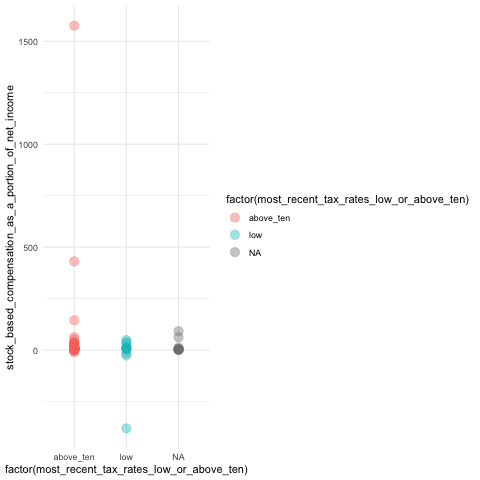

In [24]:
%%R

ggplot(df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r) +
    aes(x=factor(most_recent_tax_rates_low_or_above_ten), y=stock_based_compensation_as_a_portion_of_net_income, color=factor(most_recent_tax_rates_low_or_above_ten)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()



👉 Summary

In this chart, I plot the most normalised stock_based compensation against tax rates. 

👉 Reflection

What I can conclude based on this chart:
* This chart is helpful for seeing the difference in stock-based compensation. 
* The plot is not clear enough for me to see whether the difference is significant


# Now do a t-test to check if there is a difference

In [22]:
# df_stock_top_us_plus_sec_titles_with_links_after_copy_paste

In [25]:
%%R -i df_stock_top_us_plus_sec_titles_with_links_after_copy_paste



df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste %>% filter(most_recent_tax_rates_low_or_above_ten=='low')
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste %>% filter(most_recent_tax_rates_low_or_above_ten=='above_ten')
t.test(df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low$python_calc_stock_based_compensation_as_a_portion_of_net_income_pct, df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten$python_calc_stock_based_compensation_as_a_portion_of_net_income_pct)




	Welch Two Sample t-test

data:  df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low$python_calc_stock_based_compensation_as_a_portion_of_net_income_pct and df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten$python_calc_stock_based_compensation_as_a_portion_of_net_income_pct
t = -1.5708, df = 28.656, p-value = 0.1272
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -155.76272   20.47572
sample estimates:
mean of x mean of y 
-20.57826  47.06523 



👉 Summary

In this t-test, I test whether the difference between the effective tax rates of companies when the stock-based compensation expense is higher compared to when it is lower.


👉 Reflection

What I can conclude based on this test:
* Based on the results of the Welch Two Sample t-test, the p-value is 0.127, which is greater than the typical significance level of 0.05. This suggests that there is no statistically significant difference between the means of the two groups. 
* The 95 percent confidence interval includes negative and positive values, indicating that the true difference in means could range from -155.88581 to 20.44796.
* In summary, I  do not have enough evidence to reject the null hypothesis that the means of the two groups are equal.


##### Draft Reader-facing conclusion:
* Whether or not the effective tax rate is high does not affect the stock-based compensation expense. Stock-based compensation expenses are not likely to be higher or lower in cases where the effective tax rate is below 10 or above 10.
* The p-value in this case is large at 0.127, indicating there is no statistically significant difference between the effective tax rates of companies when the stock-based compensation expense is higher compared to when it is lower. This is a conclusion that can be supported by the initial plotting of the data which showed the data may be randomly distributed.


In [42]:
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste.to_csv("df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_w_python_calc_post_correction.csv")

# Are effective tax rates for companies smaller or higher when the tax benefits from stock compensation expense as a portion of net income are higher?

In [25]:
%%R 

df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste %>% filter(most_recent_tax_rates_low_or_above_ten=='low')
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste %>% filter(most_recent_tax_rates_low_or_above_ten=='above_ten')
t.test(df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low$python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct, df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten$python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct)





	Welch Two Sample t-test

data:  df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low$python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct and df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten$python_calc_most_recent_tax_benefits_from_stock_based_compensation_over_net_income_pct
t = 0.74241, df = 7.4179, p-value = 0.4807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.462982 12.477734
sample estimates:
mean of x mean of y 
 5.488243  2.480867 



#### Summary
The p-value of 0.4807 is greater than the conventional significance level of 0.05, suggesting that there is no statistically significant difference between the means of the two groups. Additionally, the confidence interval includes 0, further supporting the conclusion that there is no statistically significant difference in means. Therefore, based on this analysis, I do not have sufficient evidence to reject the null hypothesis that the means of the two groups are equal.

##### Draft Reader-facing conclusion:
* The tax benefits from stock-based compensation expense are not associated with whether or not the effective tax rate is above ten. Effective rates are not likely to be above or below ten depending on tax benefits from stock-based compensation expense.
* The p-value in this case is large at 0.4807, indicating there is no statistically significant difference


# Transition to basic regressions

# For tech or non_tech

In [ ]:
%%R 

# Using filter()
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na <- df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r %>%
  filter(tech_or_non_tech %in% c("tech", "non_tech"))

# 'df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na' will contain only the rows where 'non_tech_tech_column' is either 'tech' or 'non_tech', excluding 'non_tech_unsure'.
df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na <- na.omit(df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na)


In [ ]:
# %%R 

# df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na

In [ ]:
# %%R 

# df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low_tech_not_na = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na %>% filter(most_recent_tax_rates_low_or_above_ten=='low')
# df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_tax_rate_above_ten_tech_not_na = df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tech_not_na %>% filter(most_recent_tax_rates_low_or_above_ten=='above_ten')
# t.test(df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low_tech_not_na$tech_or_non_tech, df_stock_top_us_plus_sec_titles_with_links_after_copy_paste_r_tax_rate_low_tech_not_na$tech_or_non_tech)


